# Classificação de redes neurais

<ul>
    <li>Classificação binária</li>
    <li>Classificação multiclasses</li>
    <li>Classificação multirrótulo: o feature pode receber mais de um target</li>
</ul>

Muitos problemas não são resolvidos apenas com regressão linear, então fazemos outros tipos de soluções

In [2]:
from sklearn.datasets import make_circles

n_amostras = 1000

# Create circles
X, y = make_circles(n_amostras,
                    noise=0.03, # um pouco de ruído nos pontos
                    random_state=42) # manter o estado aleatório para que obtenhamos os mesmos valores

print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


Essa saida nos mostra 2 coisas: X é a representação de uma coordenada, Y é a saida, e existem 2 tipos de saida, 0 e 1 

In [3]:
# Vamos fazer uma visualização mais geral dos dados

import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})

display(circles.head(10))

# Quantos existem de cada classe?
display(circles.label.value_counts())

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


1    500
0    500
Name: label, dtype: int64

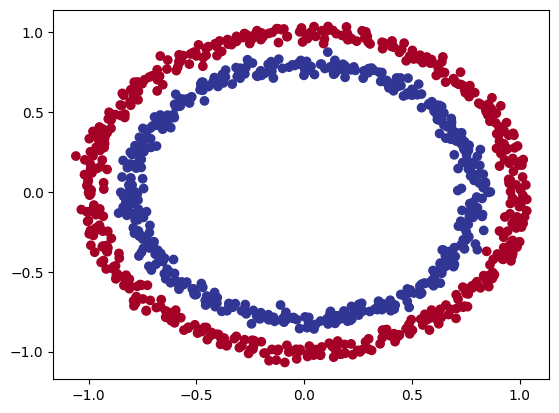

In [4]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

# Input and output shapes

É um dos tipos mais comuns de erros

Para tentar evitar esse tipo de erro: "Quais são os shapes das minhas entradas e quais são os shapes das minhas saídas?"

In [5]:
print(X.shape, y.shape)
# Aqui vemos que X tem um vetor de entrada e y é um escalar de saida

(1000, 2) (1000,)


# Transformando os dados em tensores e criando divisões de treino e teste

No momento, nossos dados estão em arrays NumPy, mas o PyTorch prefere trabalhar com tensores PyTorch.

In [6]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [7]:
# Dividindo treino e teste
# Vamos construir um modelo que prevê se o ponto está no ciclo interno ou externo dos circulos

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# Construindo um modelo

<ol>
    <li>Configurar o ambiente de trabalho(device)</li>
    <li>Construir um modelo de subclasses(nn.Model)</li>
    <li>Definir a loos_function</li>
    <li>Criar o loop de treinamento</li>
</ol>

# Configurar o ambiente de trabalho(device)

In [8]:
def select_workspace():
    if torch.cuda.is_available():
        device = "cuda"
    elif torch.backends.mps.is_available():
        device = "mps"
    else:
        device = "cpu"

    return device

device = select_workspace()
print(device)

cpu


# Construir um modelo de subclasses(nn.Model)

In [9]:
from torch import nn

# Queremos um modelo capaz de:
    # Receber os dados de X como entrada
    # Produzir algo com a mesma forma de y como saída

# Para isso, precisamos lidar com os shapes de entradas e saidas

class CirculoModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=5) # recebe 2 features (X), produz 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # recebe 5 features, produz 1 feature (y)
    
    def forward(self, x):
        return self.layer_2(self.layer_1(x))
    
modelo = CirculoModel()

self.layer_1 recebe 2 features de entrada (in_features=2) e produz 5 features de saída (out_features=5). Isso é conhecido como ter 5 unidades ocultas ou neurônios.

Essa camada transforma os dados de entrada, que tinham 2 features, em 5 features. Por que fazer isso? Isso permite que o modelo aprenda padrões a partir de 5 números em vez de apenas 2, potencialmente levando a melhores resultados.

A única regra sobre unidades ocultas é que a próxima camada, no nosso caso self.layer_2, precisa ter in_features igual ao out_features da camada anterior.

Agora, faremos uma analise dos shapes

In [10]:
# Fazer previsões com o modelo
untrained_preds = modelo(X_test.to(device))
print(f"Comprimento das previsões: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Comprimento das amostras de teste: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nPrimeiras 10 previsões:\n{untrained_preds[:10]}")
print(f"\nPrimeiros 10 rótulos de teste:\n{y_test[:10]}")


Comprimento das previsões: 200, Shape: torch.Size([200, 1])
Comprimento das amostras de teste: 200, Shape: torch.Size([200])

Primeiras 10 previsões:
tensor([[-0.1440],
        [-0.0891],
        [-0.4276],
        [-0.0631],
        [-0.6494],
        [-0.6142],
        [-0.2838],
        [-0.4074],
        [-0.4178],
        [-0.0879]], grad_fn=<SliceBackward0>)

Primeiros 10 rótulos de teste:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


Aqui temos um problema com os shapes, pois:
- Previsões.shape = [200, 1]
- Rotulos.shape   = [200]

Eles têm a mesma quantidade de elementos, mas não têm exatamente o mesmo formato.

Temos alguns passos que podemos fazer para corrigir isso, e vamos ver eles mais adiante.

# Definir a loos_function e optimizer

Já configuramos uma função de perda (também chamada de critério ou cost function) e um otimizador antes no notebook 01.

Mas diferentes tipos de problema exigem funções de perda diferentes.

Por exemplo, para um problema de regressão (prever um número), você poderia usar mean absolute error (MAE).

Para um problema de classificação binária (como o nosso), geralmente se usa binary cross entropy como função de perda.

O mesmo otimizador, no entanto, pode ser usado em diferentes tipos de problemas:

Stochastic Gradient Descent (SGD) → classificação, regressão, muitos outros.

Adam → classificação, regressão, muitos outros.

<table>
    <tr>
        <th>Função loss/optim</th>
        <th>Problema que Resolve</th>
        <th>Pytorch code</th>
    </tr>
    <tr>
        <td>Stochastic Gradient Descent (SGD) optimizer</td>
        <td>Classification, regression, many others.</td>
        <td>torch.optim.SGD()</td>
    </tr>
    <tr>
        <td>Adam Optimizer</td>
        <td>Classification, regression, many others.</td>
        <td>torch.optim.Adam()</td>
    </tr>
    <tr>
        <td>Binary cross entropy loss</td>
        <td>Binary classification</td>
        <td>torch.nn.BCEWithLogitsLoss()</td>
    </tr>
    <tr>
        <td>Cross entropy loss</td>
        <td>Multi-class classification</td>
        <td>torch.nn.CrossEntropyLoss</td>
    </tr>
    <tr>
        <td>Mean absolute error (MAE) or L1 Loss</td>
        <td>Regression</td>
        <td>torch.nn.L1Loss</td>
    </tr>
    <tr>
        <td>Mean squared error (MSE) or L2 Loss</td>
        <td>Regression</td>
        <td>torch.nn.MSELoss</td>
    </tr>
</table>


In [11]:
# Como estamos trabalhando com classificação binária, vamos usar binary cross entropy.

loss_fn = nn.BCEWithLogitsLoss()
optmizer = torch.optim.SGD(params=modelo.parameters(), lr=0.1)


Também vamos criar uma métrica de avaliação.

Função de perda mede o quão errado o modelo está.

Métrica de avaliação mede o quão certo ele está.

In [12]:
# Calcula acurácia
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()  # verifica onde os tensores são iguais
    acc = (correct / len(y_pred)) * 100
    return acc

# Treinando o modelo

In [13]:
y_logits = modelo(X_test.to(device))[:5]
y_logits

tensor([[-0.1440],
        [-0.0891],
        [-0.4276],
        [-0.0631],
        [-0.6494]], grad_fn=<SliceBackward0>)

In [14]:
# Usar sigmoid nos logits do modelo
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs # dads transformados em formato de probabilidades de previsão

# ou seja, os valores representam a confiança do modelo de que um ponto de dados pertence a uma classe ou outra.
# No nosso caso, como é classificação binária, os outputs ideais seriam 0 ou 1.

# Mais especificamente:
# Se y_pred_probs >= 0.5 → y = 1 (classe 1)
# Se y_pred_probs < 0.5 → y = 0 (classe 0)

tensor([[0.4641],
        [0.4777],
        [0.3947],
        [0.4842],
        [0.3431]], grad_fn=<SigmoidBackward0>)

In [15]:

# Variáveis

# Seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# selecionando hardware
device = select_workspace()

modelo = modelo.to(device)
X_train = X_train.to(device)
X_test  = X_test.to(device)
y_train = y_train.to(device).squeeze()
y_test  = y_test.to(device).squeeze()

# criando listas vazias para comparar os resultados
train_loss_values = []
test_loss_values = []
epoch_count = []

# Epocas
EPOCAS = 2000


In [16]:
for epoch in range(EPOCAS):
    ### Training
    modelo.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = modelo(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optmizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optmizer.step()

    ### Testing
    modelo.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = modelo(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71580, Accuracy: 50.00% | Test loss: 0.71804, Test acc: 50.00%
Epoch: 10 | Loss: 0.70093, Accuracy: 41.75% | Test loss: 0.70431, Test acc: 40.00%
Epoch: 20 | Loss: 0.69605, Accuracy: 47.25% | Test loss: 0.69942, Test acc: 44.00%
Epoch: 30 | Loss: 0.69429, Accuracy: 48.38% | Test loss: 0.69741, Test acc: 48.50%
Epoch: 40 | Loss: 0.69360, Accuracy: 49.25% | Test loss: 0.69646, Test acc: 47.50%
Epoch: 50 | Loss: 0.69330, Accuracy: 50.00% | Test loss: 0.69596, Test acc: 46.50%
Epoch: 60 | Loss: 0.69316, Accuracy: 49.75% | Test loss: 0.69565, Test acc: 46.50%
Epoch: 70 | Loss: 0.69308, Accuracy: 50.88% | Test loss: 0.69546, Test acc: 46.00%
Epoch: 80 | Loss: 0.69304, Accuracy: 50.62% | Test loss: 0.69532, Test acc: 45.50%
Epoch: 90 | Loss: 0.69302, Accuracy: 50.75% | Test loss: 0.69522, Test acc: 48.00%
Epoch: 100 | Loss: 0.69300, Accuracy: 51.00% | Test loss: 0.69514, Test acc: 47.00%
Epoch: 110 | Loss: 0.69300, Accuracy: 51.38% | Test loss: 0.69509, Test acc: 47.00%
Epo

In [17]:
print(torch.eq(y_logits, y_pred)) # Isso mostra que é importante arredondar e fazer o sigmoid

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

O modelo tem 50% de acerto, oq é horrivel para classificação binária.
Para resolver isso, precisamos analisar a causa,e vamos visualizar esses dados agora mesmo

In [18]:
import requests
from pathlib import Path 

# Baixar as funções auxiliares do repositório Learn PyTorch (se ainda não existirem)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


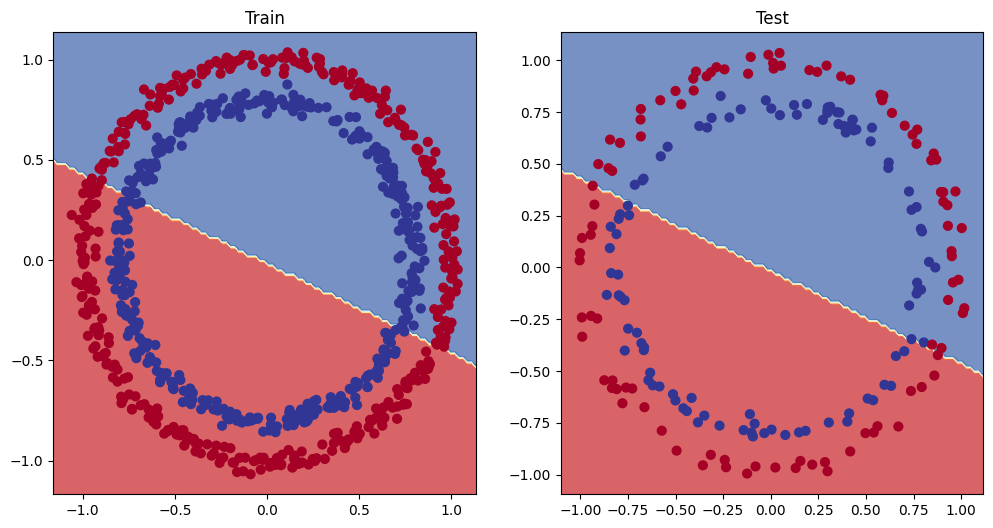

In [19]:
# Plotar as fronteiras de decisão para os conjuntos de treino e teste
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(modelo, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(modelo, X_test, y_test)


Parece que descobrimos o motivo do erro, mas agora precisamos resolver o problema.

# Opções de soluções

<table>
    <tr>
        <td>Tecnica de Melhoramento do modelo</td>
        <td>O que ele faz?</td>
    </tr>
    <tr>
        <td>Adicionar mais camadas</td>
        <td>Cada camada potencialmente aumenta a capacidade de aprendizado do modelo, com cada camada sendo capaz de aprender algum novo padrão nos dados. Mais camadas geralmente são chamadas de deixar a rede neural mais profunda.</td>
    </tr>
    <tr>
        <td>Adicionar mais unidades ocultas</td>
        <td>Similar ao item acima, mais unidades ocultas por camada significam um aumento potencial na capacidade de aprendizado do modelo. Mais unidades ocultas geralmente são chamadas de deixar a rede neural mais larga.</td>
    </tr>
    <tr>
        <td>Treinar por mais tempo (mais épocas)</td>
        <td>Seu modelo pode aprender mais se tiver mais oportunidades de ver os dados.</td>
    </tr>
    <tr>
        <td>Mudar as funções de ativação</td>
        <td>Alguns dados simplesmente não podem ser ajustados apenas com linhas retas (como vimos), usar funções de ativação não lineares pode ajudar com isso.</td>
    </tr>
    <tr>
        <td>Mudas a taxa de aprendizado</td>
        <td>Menos específico do modelo, mas ainda relacionado: a taxa de aprendizado do otimizador decide o quanto o modelo deve alterar seus parâmetros a cada passo; muito alta e o modelo corrige demais, muito baixa e ele não aprende o suficiente.</td>
    </tr>
    <tr>
        <td>Mudar a função de perda</td>
        <td>Novamente, menos específico do modelo, mas ainda importante: problemas diferentes exigem funções de perda diferentes. Por exemplo, uma função de perda de entropia cruzada binária não funciona para um problema de classificação multiclasse.</td>
    </tr>
    <tr>
        <td>Usar transfer learning</td>
        <td>Pegar um modelo pré-treinado de um domínio de problema similar ao seu e ajustá-lo ao seu próprio problema. Cobrimos transfer learning no notebook 06.</td>
    </tr>
</table>

Nota: como você pode ajustar tudo isso manualmente, eles são chamados de hiperparâmetros.

E é aqui que entra o lado “meio arte, meio ciência” do machine learning: não há uma forma real de saber qual é a melhor combinação de valores para o seu projeto, o melhor é seguir o lema do cientista de dados: “experimente, experimente, experimente”.

Vamos ver o que acontece se adicionarmos uma camada extra ao nosso modelo, treinarmos por mais tempo (epochs = 1000 em vez de epochs = 100) e aumentarmos o número de unidades ocultas de 5 para 10.

# FAZENDO TUDO DE NOVO

In [20]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # camada extra
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x): # nota: sempre garanta que forward está escrito corretamente!
        # Criar um modelo assim é o mesmo que abaixo, embora abaixo
        # geralmente se beneficie de otimizações de velocidade quando possível.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

modelo = CircleModelV1()

In [21]:
for epoch in range(EPOCAS):
    ### Treinamento
    # 1. Forward pass
    y_logits = modelo(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> probabilidades -> rótulos

    # 2. Calcular perda/acurácia
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. Zerar gradientes do otimizador
    optmizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Passo do otimizador
    optmizer.step()

    ### Teste
    modelo.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = modelo(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calcular perda/acurácia
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Mostrar o progresso a cada 100 épocas
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 200 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 300 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 400 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 500 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 600 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 700 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 800 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 900 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 1000 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 1100 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc:

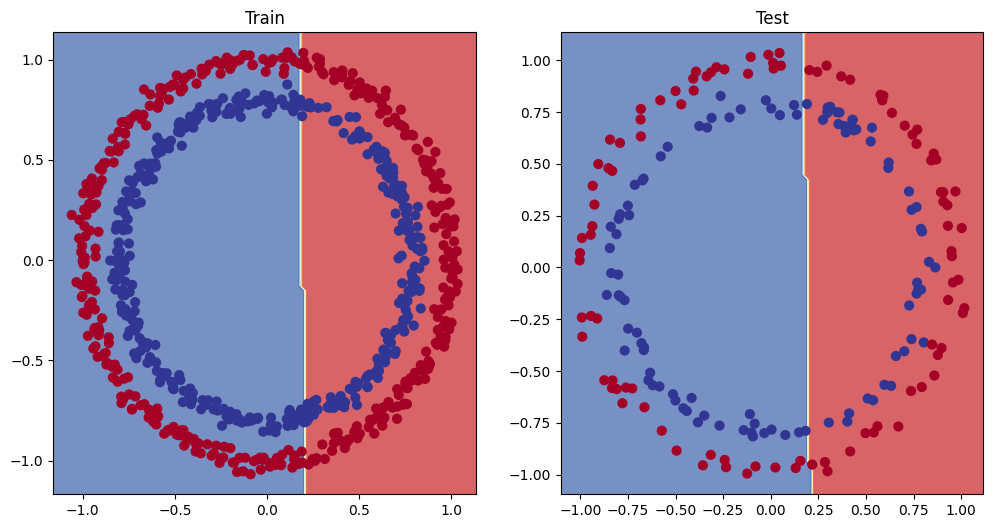

In [22]:
# Plotar as fronteiras de decisão para os conjuntos de treino e teste
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(modelo, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(modelo, X_test, y_test)


# MODELO NÃO LINEAR

In [29]:
# Construindo um modelo não linear
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # Isso torna o bgl não linear

    def forward(self, x):
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [30]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [31]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1500

for epoch in range(1, epochs + 1):
    y_logits = torch.squeeze(model_3(X_train))
    y_pred = torch.round(torch.sigmoid(y_logits))

    # loss e acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train,
                      y_pred = y_pred
                      )
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = torch.squeeze(model_3(X_test))
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test,
                               y_pred = test_pred
                               )
        
    if (epoch % 100 == 0):
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 100 | Loss: 0.69302, Accuracy: 49.75% | Test Loss: 0.69123, Test Accuracy: 54.00%
Epoch: 200 | Loss: 0.69130, Accuracy: 50.88% | Test Loss: 0.68962, Test Accuracy: 56.50%
Epoch: 300 | Loss: 0.68998, Accuracy: 51.38% | Test Loss: 0.68848, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68844, Accuracy: 52.50% | Test Loss: 0.68705, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68642, Accuracy: 52.62% | Test Loss: 0.68520, Test Accuracy: 55.50%
Epoch: 600 | Loss: 0.68364, Accuracy: 53.37% | Test Loss: 0.68282, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.67954, Accuracy: 62.00% | Test Loss: 0.67976, Test Accuracy: 61.00%
Epoch: 800 | Loss: 0.67335, Accuracy: 64.00% | Test Loss: 0.67550, Test Accuracy: 58.50%
Epoch: 900 | Loss: 0.66406, Accuracy: 66.62% | Test Loss: 0.66936, Test Accuracy: 61.50%
Epoch: 1000 | Loss: 0.64964, Accuracy: 66.62% | Test Loss: 0.65931, Test Accuracy: 59.50%
Epoch: 1100 | Loss: 0.62493, Accuracy: 68.88% | Test Loss: 0.63976, Test Accuracy: 62.00%
Epoch: 1200 | Loss:

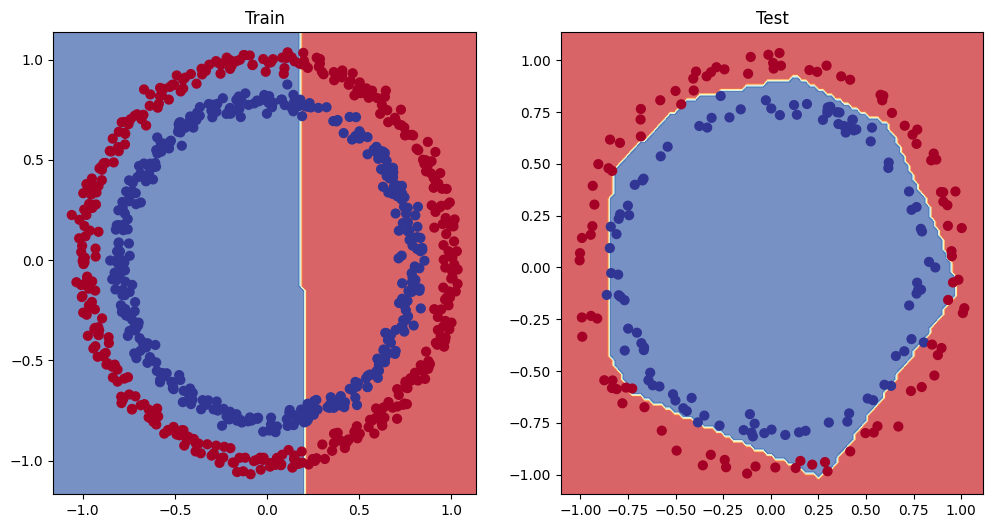

In [33]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(modelo, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity